# **SENTIMENT ANALYSIS and PREDICTOR using NLP**

In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Dropout, Bidirectional,Conv1D,MaxPooling1D,AveragePooling1D,Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv('/content/drive/MyDrive/CDC/Sentiment_Dataset/train.csv', encoding='latin1')
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [3]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')

In [4]:
df1=df.drop(['textID','Time of Tweet','Age of User','Country', 'Population -2020', 'Land Area (Km²)','Density (P/Km²)'],axis=1)
df1.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
df1.dropna()

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...
27476,wish we could come see u on Denver husband l...,d lost,negative
27477,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,But it was worth it ****.,But it was worth it ****.,positive


In [6]:
df1.sentiment.value_counts()

sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64

The data is ready to be feeded.

**MODEL TRAINING**

In [20]:
import re
def clean_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Remove all numeric values (including floats)
        text = re.sub(r'\d+(\.\d+)?', '', text)
        # Remove all non-alphabetic characters
        cleaned_text = re.sub('[^A-Za-z\s]+', '', text)
        return cleaned_text.strip()  # Remove leading/trailing whitespace
    else:
        return text

df1['text'] = df1['text'].apply(clean_text)


df1.head()


,text,selected_text,sentiment
0,Id have responded if I were going,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego,Sooo SAD,negative
2,my boss is bullying me,bullying me,negative
3,what interview leave me alone,leave me alone,negative
4,Sons of why couldnt they put them on the rele...,"Sons of ****,",negative


In [45]:
map={'negative':0,'neutral':1,'positive':2}
df1['sentiment']=df1['sentiment'].map(map)
df1.head()

,text,selected_text,sentiment
0,Id have responded if I were going,"I`d have responded, if I were going",1
1,Sooo SAD I will miss you here in San Diego,Sooo SAD,0
2,my boss is bullying me,bullying me,0
3,what interview leave me alone,leave me alone,0
4,Sons of why couldnt they put them on the rele...,"Sons of ****,",0


In [46]:
text = df1['text'].astype(str).tolist()
label=df1['sentiment']

In [47]:
training_size=int(len(text)*0.8)

In [48]:
training_text=text[:training_size]
testing_text=text[training_size:]
training_label=label[:training_size]
testing_label=label[training_size:]

In [49]:
training_text

['Id have responded if I were going',
 'Sooo SAD I will miss you here in San Diego',
 'my boss is bullying me',
 'what interview leave me alone',
 'Sons of  why couldnt they put them on the releases we already bought',
 'httpwwwdothebouncycomsmf  some shameless plugging for the best Rangers forum on earth',
 'am feedings for the baby are fun when he is all smiles and coos',
 'Soooo high',
 'Both of you',
 'Journey Wow u just became cooler  hehe is that possible',
 'as much as i love to be hopeful i reckon the chances are minimal P im never gonna get my cake and stuff',
 'I really really like the song Love Story by Taylor Swift',
 'My Sharpie is running DANGERously low on ink',
 'i want to go to music tonight but i lost my voice',
 'test test from the LG enV',
 'Uh oh I am sunburned',
 'Sok trying to plot alternatives as we speak sigh',
 'ive been sick for the past few days  and thus my hair looks wierd  if i didnt have a hat on it would look httptinyurlcommnfkw',
 'is back home now    

In [50]:
tokenizer=Tokenizer(num_words=10000,oov_token="OOV")
tokenizer.fit_on_texts(training_text)

word_index=tokenizer.word_index
training_text=tokenizer.texts_to_sequences(training_text)
testing_text=tokenizer.texts_to_sequences(testing_text)
training_padded=pad_sequences(training_text,maxlen=100,padding='post',truncating='post')
testing_padded=pad_sequences(testing_text,maxlen=100,padding='post')

In [51]:
training_padded=np.array(training_padded)
testing_padded=np.array(testing_padded)
training_label=np.array(training_label)
testing_label=np.array(testing_label)

In [52]:
model=Sequential()
model.add(Embedding(10000,16,input_length=100))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           160000    
                                                                 
 bidirectional_4 (Bidirecti  (None, 128)               41472     
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 3)                 387       
                                                                 
Total params: 201859 (788.51 KB)
Trainable params: 201859 (788.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
epochs=30
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history=model.fit(training_padded,training_label,epochs=epochs,validation_data=(testing_padded,testing_label),callbacks=[early_stopping])

Epoch 1/30
687/687 [==============================] - 30s 37ms/step - loss: 0.8859 - accuracy: 0.5781 - val_loss: 0.7411 - val_accuracy: 0.6782
Epoch 2/30
687/687 [==============================] - 9s 13ms/step - loss: 0.6548 - accuracy: 0.7308 - val_loss: 0.7012 - val_accuracy: 0.6971
Epoch 3/30
687/687 [==============================] - 9s 13ms/step - loss: 0.5608 - accuracy: 0.7819 - val_loss: 0.7050 - val_accuracy: 0.7066
Epoch 4/30
687/687 [==============================] - 9s 13ms/step - loss: 0.4945 - accuracy: 0.8108 - val_loss: 0.7514 - val_accuracy: 0.7080
Epoch 5/30
687/687 [==============================] - 8s 11ms/step - loss: 0.4438 - accuracy: 0.8368 - val_loss: 0.7860 - val_accuracy: 0.6869


In [86]:
# Convert the model to TFLite format with Select TF ops
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Enable TensorFlow Lite ops.
    tf.lite.OpsSet.SELECT_TF_OPS     # Enable Select TF ops.
]
converter._experimental_lower_tensor_list_ops = False

try:
    tflite_model = converter.convert()
    # Save the TFLite model to a file
    tflite_model_file = 'model.tflite'
    with open(tflite_model_file, 'wb') as f:
        f.write(tflite_model)
    print(f"TFLite model saved to {tflite_model_file}")
except Exception as e:
    print("Error converting model to TFLite:", e)

TFLite model saved to model.tflite


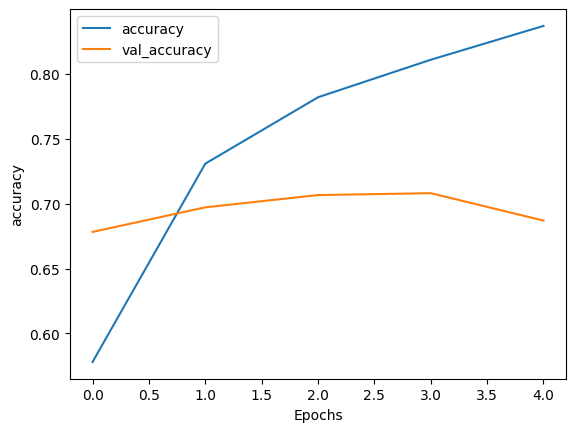

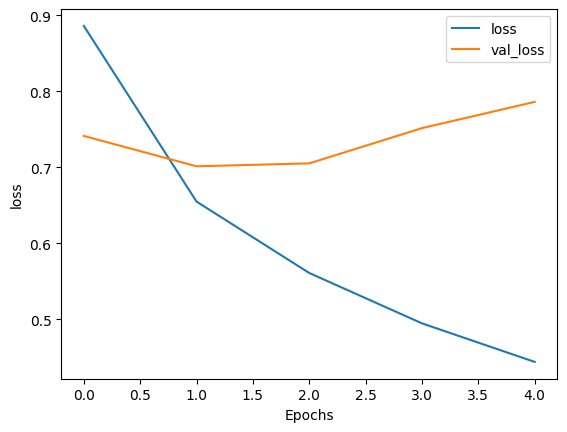

In [54]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [57]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_text[2])
print(label[2])

id have responded if i were going ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
[6, 1141, 10, 8833, 16]
0


In [58]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [60]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, 10000):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [61]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
def predict_sentiment(text):
  sequences = tokenizer.texts_to_sequences(text)
  padded = pad_sequences(sequences, maxlen=100, padding="post", truncating="post")
  predictions =model.predict(padded)
  predicted_classes = np.argmax(predictions, axis=1)
  for i in range(len(predicted_classes)):
    if predicted_classes[i] == 0:
      print("The sentiment of the comment is Negative")
    elif predicted_classes[i] == 1:
      print("The sentiment of the comment is Neutral")
    elif predicted_classes[i] == 2:
      print("The sentiment of the comment is Positive")

sentences = ["Ohh thats so sad!!", "game of thrones season finale showing this sunday night"]
predict_sentiment(sentences)

1/1 [==============================] - 0s 21ms/step
The sentiment of the comment is Negative
The sentiment of the comment is Neutral


In [82]:
sentence = ["Ohh thats so sad!!", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=100, padding="post", truncating="post")
predicted_classes = np.argmax(model.predict(padded), axis=1)
print(predicted_classes)

1/1 [==============================] - 0s 21ms/step
[0 1]
